<a href="https://colab.research.google.com/github/tim530712345/20210615/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml0602/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ml0602/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7fa4d1ca8950>)

In [23]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")

In [24]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
data = pd.concat([train_df,test_df], ignore_index=True) # 重製列標號
data = data.drop(['PassengerId','Survived'], axis=1)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
na = data.isna().sum() # 顯示是否為空值 用sum可以檢查出多少是1或0
# 對series做篩選 Series[帶入跟你的資料筆數一樣多的True/False list]
na[na > 0].sort_values(ascending=False) # na[na > 0] 將大於0的顯示出來,sort_values 做排序，ascending=False 大到小排序  

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

**轉換欄位值**

In [27]:
s = pd.Series([1,2,3])
#def func(n):
 # return n*n
#s.apply(n)
s.apply(lambda n:n*n) # lambda 無名函式 將上述的def寫成一行

0    1
1    4
2    9
dtype: int64

In [28]:
def cabin_head(s):
  if not pd.isna(s):
    return s[0]
data['Cabin'] = data['Cabin'].apply(cabin_head)

In [29]:
dic = data['Ticket'].value_counts()
data['Ticket'] = data['Ticket'].apply(lambda t:dic[t])

**補缺失值**

In [30]:
# 補缺失值(類別: 捕最常出現) [如果一堆測試資料 不要重算 直接補S]
most = data['Embarked'].value_counts().idxmax()
data['Embarked'] = data['Embarked'].fillna(most)
na = data.isna().sum() # 顯示是否為空值 用sum可以檢查出多少是1或0
# 對series做篩選 Series[帶入跟你的資料筆數一樣多的True/False list]
na[na > 0].sort_values(ascending=False) # na[na > 0] 將大於0的顯示出來,sort_values 做排序，ascending=False 大到小排序  

Cabin    1014
Age       263
Fare        1
dtype: int64

In [31]:
# 補缺失值(數值:中位數)
med = data.median().drop(['Pclass'])
data = data.fillna(med)
na = data.isna().sum()
na[na>0].sort_values(ascending=False)

Cabin    1014
dtype: int64

凡事都先用決策樹來想想
**只要是類別型態 就要用one-hot encoding**
變成是非題來做

In [32]:
def name_convert(s):
  s = s.split(',')[-1].split('.')[0]
  s = s.strip()
  return s
counts = data['Name'].apply(name_convert).value_counts()
whitelist = counts[counts>50].index
def name_convert(s):
  s = s.split(',')[-1].split('.')[0]
  s = s.strip()
  if s in whitelist:
    return s
  else:
    return None
data['Name'] = data['Name'].apply(name_convert)

PClass 類別: 補上最常出現 可省略One-Hot(只有1,2,3) **做與不做? 試過就知道**

可省略one hot: (**但通常都要做-->做好後看效果**)
  大小類別: Pclass
  二值型: Sex 


In [33]:
data = pd.get_dummies(data)
data = pd.get_dummies(data,columns=['Pclass'])
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


**預處理:**
1. 不可以隨便去掉欄位
2. 不要做出不合理的分類: Age 不能分類 但可以增加一個欄位family=sibsp+parch(兩個相似欄位)


In [34]:
#　模型建立完後，做後續的嘗試
data['Family'] = data['SibSp'] + data['Parch']
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [35]:
print(len(data))
print(data.shape)

1309
(1309, 26)


In [36]:
# .loc 根據列標號來取列 .iloc 根據第幾個
# .loc 第一列，第二列，第三列
x_train = data.iloc[:train_df.shape[0]]
y_train = train_df['Survived']
x_predict = data.iloc[train_df.shape[0]:]
x_train

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,1,13.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
887,19.0,0,0,1,30.0000,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
888,28.0,1,2,4,23.4500,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
889,26.0,0,0,1,30.0000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [37]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score # 交叉驗證
from sklearn.ensemble import RandomForestClassifier # 隨機森林
params = {
    # 有三種方式呈現: 1. 5 2. [1,2,3] 3. range
    # 20-99
    'n_estimators':range(20,100),
    # 3-10
    'max_depth': (3,11)
}
clf = RandomForestClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_train, y_train)
print(cv.best_score_) 
print(cv.best_params_)

0.832796504369538
{'max_depth': 11, 'n_estimators': 31}


In [38]:
clf = RandomForestClassifier(n_estimators=80, max_depth=9) # n_estimators 幾顆決策樹(全部參數都做一遍)(20-100)
scores = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1) # n_jobs 多少個核心
print('10:', scores)
print('average', np.average(scores))

10: [0.8        0.84269663 0.74157303 0.86516854 0.8988764  0.83146067
 0.82022472 0.78651685 0.86516854 0.80898876]
average 0.826067415730337


In [39]:
clf = RandomForestClassifier(n_estimators=80, max_depth=9)
clf.fit(x_train,y_train)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':pre
})
df.to_csv('rf.csv',encoding='utf-8',index=False) # index=False 輸出不顯示索引值
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


畫決策樹


80


[Text(279.0, 475.65000000000003, 'Sex_male <= 0.5\ngini = 0.466\nsamples = 551\nvalue = [562, 329]\nclass = Dead'),
 Text(139.5, 339.75, 'Ticket <= 5.5\ngini = 0.394\nsamples = 184\nvalue = [75, 203]\nclass = Alived'),
 Text(69.75, 203.85000000000002, 'Fare <= 15.625\ngini = 0.35\nsamples = 169\nvalue = [58, 198]\nclass = Alived'),
 Text(34.875, 67.94999999999999, '\n  (...)  \n'),
 Text(104.625, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 203.85000000000002, 'Fare <= 206.963\ngini = 0.351\nsamples = 15\nvalue = [17, 5]\nclass = Dead'),
 Text(174.375, 67.94999999999999, '\n  (...)  \n'),
 Text(244.125, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 339.75, 'Fare <= 15.146\ngini = 0.327\nsamples = 367\nvalue = [487, 126]\nclass = Dead'),
 Text(348.75, 203.85000000000002, 'Ticket <= 1.5\ngini = 0.203\nsamples = 227\nvalue = [324, 42]\nclass = Dead'),
 Text(313.875, 67.94999999999999, '\n  (...)  \n'),
 Text(383.625, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 203.8500000

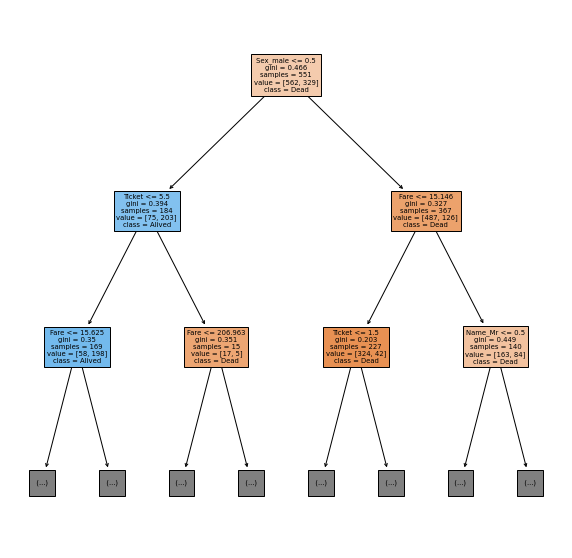

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(len(clf.estimators_))
plt.figure(figsize=(10,10))
plot_tree(
    clf.estimators_[0],
    feature_names=data.columns,
    class_names=['Dead','Alived'],
    max_depth=2,
    filled=True
)

In [42]:
pd.DataFrame({
    'Name':data.columns,
    'Importance':clf.feature_importances_
}).sort_values(by='Importance',ascending=False)
# suum(clf.feature_importances_)==1

,Name,Importance
7,Name_Mr,0.133850
4,Fare,0.128199
9,Sex_female,0.119675
10,Sex_male,0.110952
0,Age,0.095973
3,Ticket,0.056444
24,Pclass_3,0.052029
25,Family,0.043307
1,SibSp,0.037441
8,Name_Mrs,0.035554


**畫圖做分析**

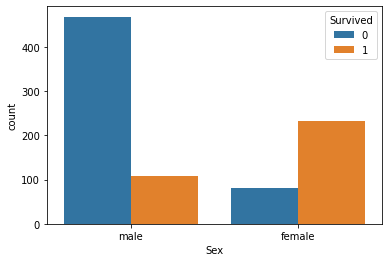

In [46]:
import seaborn as sns
sns.countplot(x=train_df['Sex'], hue=train_df['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

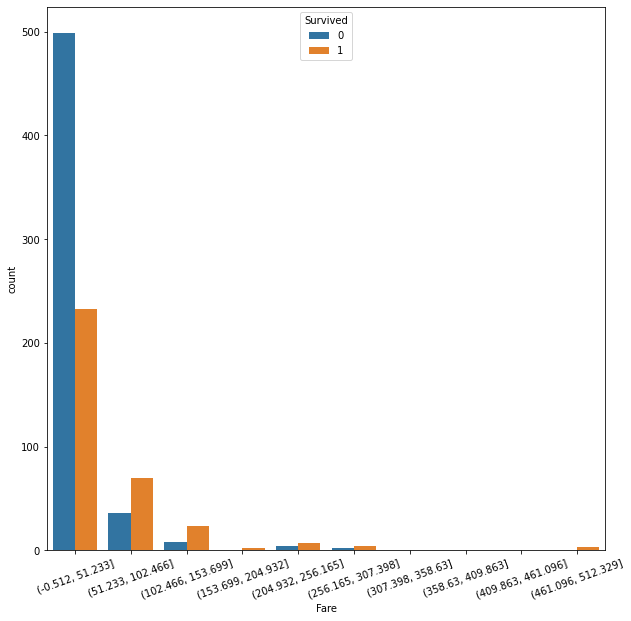

In [50]:
plt.figure(figsize=(10,10))
c = pd.cut(train_df['Fare'], bins=10)
sns.countplot(c, hue=train_df["Survived"])
plt.xticks(rotation=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

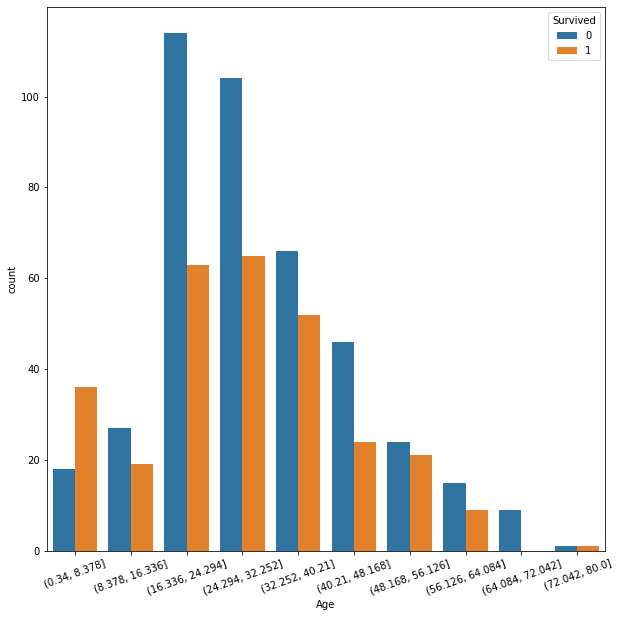

In [51]:
plt.figure(figsize=(10,10))
c = pd.cut(train_df['Age'], bins=10)
sns.countplot(c, hue=train_df["Survived"])
plt.xticks(rotation=20)

**要記下來才好畫圖:**

title，legend, label， ticks

**運用不同演算法: KNN**

距離相關的演算法 需要基底差不多

一定需要做Scaling 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns=data.columns)
# .loc 根據列標號來取列 .iloc 根據第幾個
# .loc 第一列，第二列，第三列
x_train_scale = data.iloc[:train_df.shape[0]]
x_predict_scale = data.iloc[train_df.shape[0]:]
x_train_scale

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    'n_neighbors': range(3,100)
}
clf = KNeighborsClassifier()
cv = GridSearchCV(clf,params, cv=10, n_jobs=-1)
cv.fit(x_train_scale,y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale,y_train)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':pre
})
df.to_csv('knn.csv',encoding='utf-8',index=False)
df